In [3]:
import pandas as pd
import numpy as np
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

# According to UCI docs, there’s no header in this dataset, so we specify column names manually:
cols = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
    "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg",
    "price"
]

# Load directly into pandas
df = pd.read_csv(url, names=cols)

# Quick sanity check
df.replace("?", np.nan, inplace = True)
print(df.head())
print(df.info())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [15]:
pd.get_dummies(df["fuel-type"])

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
200,False,True
201,False,True
202,False,True
203,True,False


In [21]:
df["price"]

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [40]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")

In [61]:
df = df.dropna(subset=["price"])

In [52]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
import pandas as pd
import numpy as np

# Clean the dataset first
df.replace("?", np.nan, inplace=True)

# Convert the price column to numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Confirm column type (should be float64)
print(df["price"].dtype)

# Drop rows with missing price values (optional)
df = df.dropna(subset=["price"])

# Define bins and labels
bins = np.linspace(5000, 46000, 4)
group_names = ['Low Price', 'Medium Price', 'High Price']

# Categorize
df["price_category"] = pd.cut(df["price"], bins=bins, labels=group_names)

# Inspect
print(df[["price", "price_category"]].head(10))
print(df["price_category"].value_counts(dropna=False))


float64
      price price_category
0   13495.0      Low Price
1   16500.0      Low Price
2   16500.0      Low Price
3   13950.0      Low Price
4   17450.0      Low Price
5   15250.0      Low Price
6   17710.0      Low Price
7   18920.0   Medium Price
8   23875.0   Medium Price
10  16430.0      Low Price
price_category
Low Price       172
Medium Price     18
High Price       11
Name: count, dtype: int64


In [7]:
df = pd.read_csv(url, names=cols)
df.replace("?", np.nan, inplace = True) #replaces ? with nan
df.head()  #shows the first 5 rows
df.info()  #shows the column data types and missing values

#converts price column to numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")

#creates 3 intervals between 5000 and 46000
bins = np.linspace(5000, 46000, 4)                      
group_names = ['Low Price', 'Medium Price', 'High Price']

df["price_category"] = pd.cut(df["price"], bins=bins, labels=group_names)

# Inspect the result
print(df[["price", "price_category"]].head(20))
print(df["price_category"].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors="coerce")
print("Average of normalized-losses:", df["normalized-losses"].mean())

Average of normalized-losses: 122.0


In [15]:
import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

columns = [ "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
    "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg",
    "price"]

df = pd.read_csv(url, names=columns)
df.replace("?", np.nan, inplace = True) #replaces ? with nan
df.head()  #shows the first 5 rows
df.info()  #shows the column data types and missing values

#converts price column to numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")
# Drop rows with missing price values (optional)
df = df.dropna(subset=["price"])

#creates 3 intervals between 5000 and 46000
bins = np.linspace(5000, 46000, 4)                      
group_names = ['Low Price', 'Medium Price', 'High Price']

df["price_category"] = pd.cut(df["price"], bins=bins, labels=group_names)

# Inspect the result
print(df[["price", "price_category"]].head(20))
#Counts values in each category
print(df["price_category"].value_counts(dropna=False))


#Calculate mean for normalized losses
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [17]:
print("Average of stroke:", df["stroke"].astype(float).mean())


Average of stroke: 3.256903553299492


In [29]:
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors="coerce")
avg_norm_loss = df["normalized-losses"].mean()

In [31]:
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [33]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [35]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

In [37]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [39]:
df['num-of-doors'].head(20)

0      two
1      two
2      two
3     four
4     four
5      two
6     four
7     four
8     four
10     two
11    four
12     two
13    four
14    four
15    four
16     two
17    four
18     two
19     two
20    four
Name: num-of-doors, dtype: object

In [45]:
df["horsepower"]=pd.to_numeric(df["horsepower"], errors = "coerce")

Text(0.5, 1.0, 'horsepower bins')

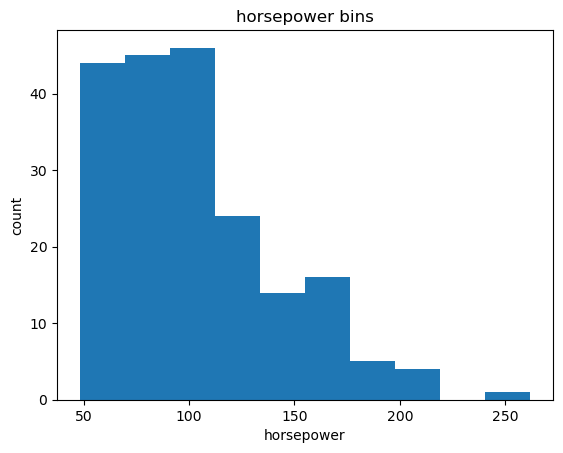

In [61]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [49]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [51]:
group_names = ['Low', 'Medium', 'High']

In [53]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
10,101.0,Low


In [55]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       151
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

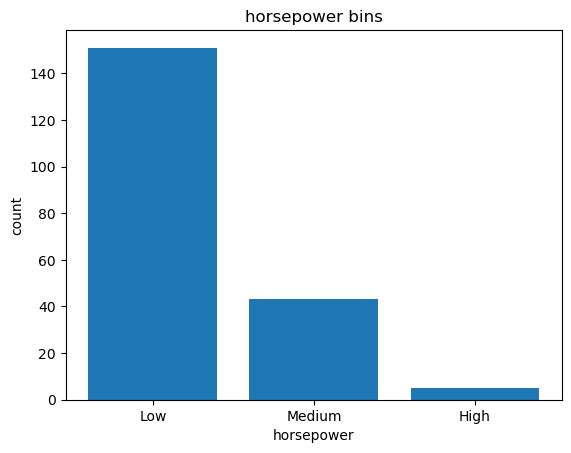

In [57]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

columns = [ "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
    "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg",
    "price"]

df = pd.read_csv(url, names=columns)
df.replace("?", np.nan, inplace = True) #replaces ? with nan
df.head()  #shows the first 5 rows
df.info()  #shows the column data types and missing values

#converts price column to numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")
# Drop rows with missing price values (optional)
df = df.dropna(subset=["price"])

#creates 3 intervals between 5000 and 46000
bins = np.linspace(min(df["price"]), max(df["price"]), 4)                      
group_names = ['Low Price', 'Medium Price', 'High Price']

df["price_category"] = pd.cut(df["price"], bins=bins, labels=group_names)

# Inspect the result
print(df[["price", "price_category"]].head(20))
#Counts values in each category
print(df["price_category"].value_counts(dropna=False))


#Calculate mean for normalized losses
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors="coerce")
avg_norm_loss = df["normalized-losses"].mean()
print("Average of normalized-losses:", avg_norm_loss)

#replace null values with the averaged normalized loss
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#to see which values are present in the column
df['num-of-doors'].value_counts()
#to get the most common type
df['num-of-doors'].value_counts().idxmax()
#to get n rows from the column
df['num-of-doors'].head(20)

df["horsepower"]=pd.to_numeric(df["horsepower"], errors = "coerce")

#Binning column horsepower
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

#Plot the graph for each bin in horsepower
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")


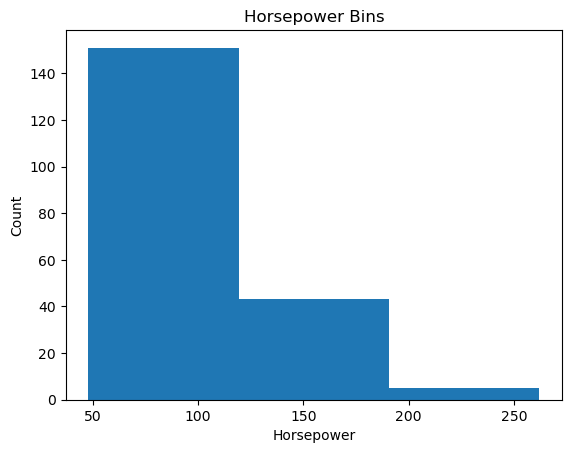

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# draw histogram of attribute "horsepower" with 3 bins
plt.hist(df["horsepower"], bins=3)

# set x/y labels and plot title
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")

# show the plot
plt.show()


Text(0.5, 1.0, 'horsepower bins')

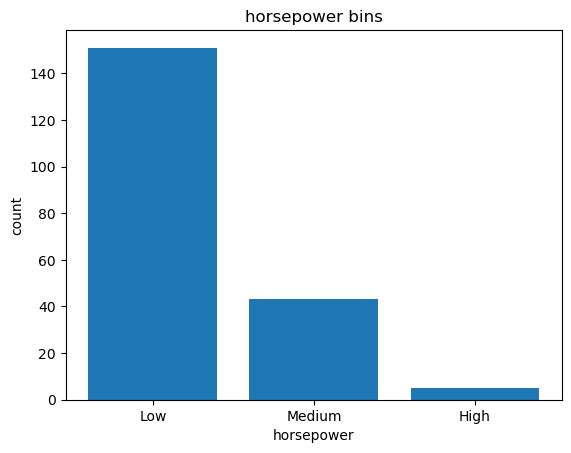

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [1]:
import seaborn as sns

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

columns = [ "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
    "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg",
    "price"]

df = pd.read_csv(url, names=columns)
df['peak-rpm'].dtypes

dtype('O')

In [9]:
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors = "coerce")

In [11]:
df['peak-rpm'].dtypes

dtype('float64')

In [15]:
df[['peak-rpm']].corr()

,peak-rpm
peak-rpm,1.0


In [21]:
df['bore'] = pd.to_numeric(df['bore'], errors = "coerce")
df['stroke'] = pd.to_numeric(df['stroke'], errors = "coerce")
df['compression-ratio'] = pd.to_numeric(df['compression-ratio'], errors = "coerce")
df['horsepower'] = pd.to_numeric(df['horsepower'], errors = "coerce")

df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055909,0.005203,0.577273
stroke,-0.055909,1.000000,0.186170,0.090254
compression-ratio,0.005203,0.186170,1.000000,-0.205874
horsepower,0.577273,0.090254,-0.205874,1.000000


(0.0, 53485.474875984015)

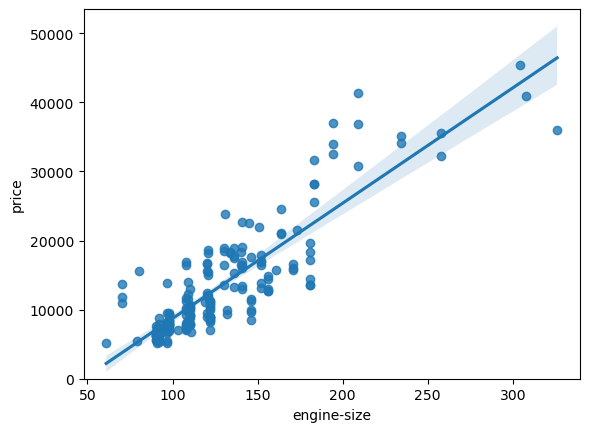

In [29]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['engine-size'] = pd.to_numeric(df['engine-size'], errors='coerce')

import matplotlib.pyplot as plt 
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [31]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

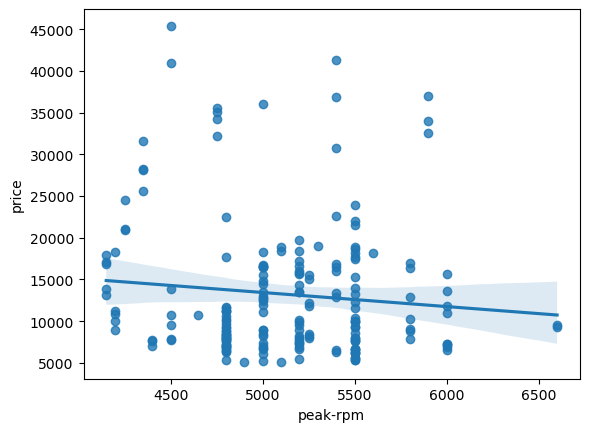

In [33]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [35]:
df[['price','stroke']].corr()

,price,stroke
price,1.00000,0.08231
stroke,0.08231,1.00000


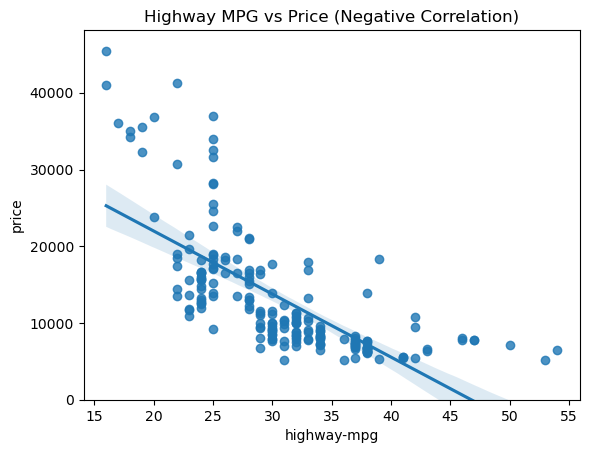

In [37]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)  # Optional: prevents negative prices
plt.title("Highway MPG vs Price (Negative Correlation)")
plt.show()

In [1]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Load data with correct column names
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
                'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
                'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
                'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
                'city-mpg', 'highway-mpg', 'price']

df = pd.read_csv(url, names=column_names)

# Step 2: Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Step 3: Select and convert relevant columns to float
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['highway-mpg'] = pd.to_numeric(df['highway-mpg'], errors='coerce')

# Step 4: Drop rows where 'price' or 'highway-mpg' is missing
df.dropna(subset=['price', 'highway-mpg'], inplace=True)

# Step 5: Prepare X and Y
X = df[['highway-mpg']]  # 2D array required
Y = df['price']

# Step 6: Fit the model
lm = LinearRegression()
lm.fit(X, Y)

# Step 7: Predict
Yhat = lm.predict(X)
print(Yhat[0:5])

[16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]


In [13]:
lm.coef_

array([-821.73337832])

In [15]:
lm.intercept_

38423.305858157386

In [17]:
lm.fit(X, Y)

LinearRegression()

In [21]:
lm1 = LinearRegression()
lm1
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [25]:
lm1.coef_ 

array([[166.86001569]])

In [27]:
lm1.intercept_

array([-7963.33890628])

In [47]:
df.replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'], inplace=True)

df['horsepower'] = pd.to_numeric(df['horsepower'], errors = "coerce")
df['curb-weight'] = pd.to_numeric(df['curb-weight'], errors = "coerce")
df['engine-size'] = pd.to_numeric(df['engine-size'], errors = "coerce")
df['highway-mpg'] = pd.to_numeric(df['highway-mpg'], errors = "coerce")
df["price"] = pd.to_numeric(df["price"], errors = "coerce")


X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df['price']
lm.fit(X, df["price"])

LinearRegression()

In [37]:
lm.intercept_

-15700.5739790393

In [39]:
lm.coef_

array([53.27878556,  4.66217408, 82.22948394, 35.5175845 ])

In [61]:
Yhat = lm.predict(X)
print(Yhat[0:5])

[13741.39845627 13741.39845627 19088.01516843 10657.90424705
 15557.06262444]


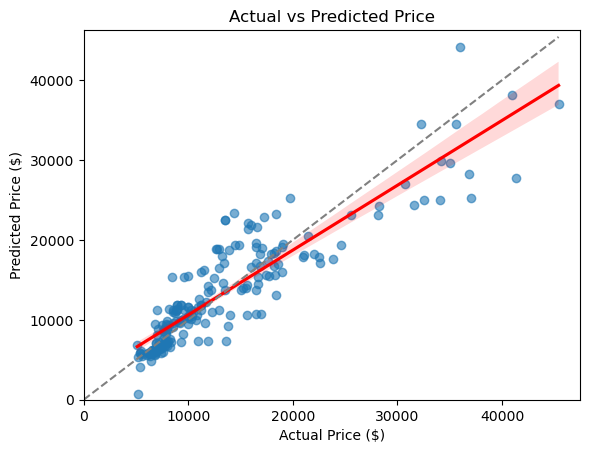

In [67]:
# Make sure Y and Yhat are aligned and clean
sns.regplot(x=Y, y=Yhat, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Price')
plt.xlim(0, None)   # Start x-axis at 0
plt.ylim(0, None)   # Start y-axis at 0
plt.plot([0, Y.max()], [0, Y.max()], color='gray', linestyle='--')  # Perfect line
plt.show()

(0.0, 48155.79824087276)

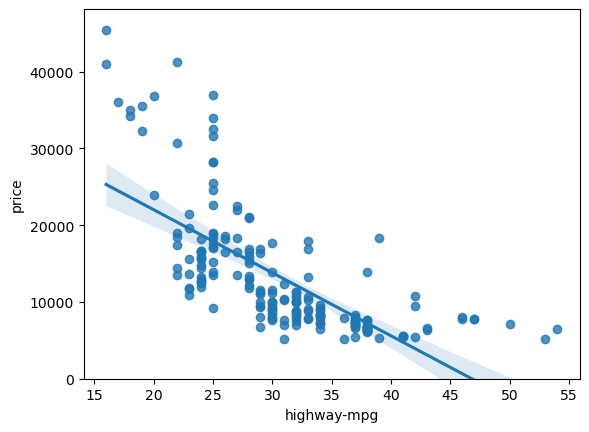

In [71]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

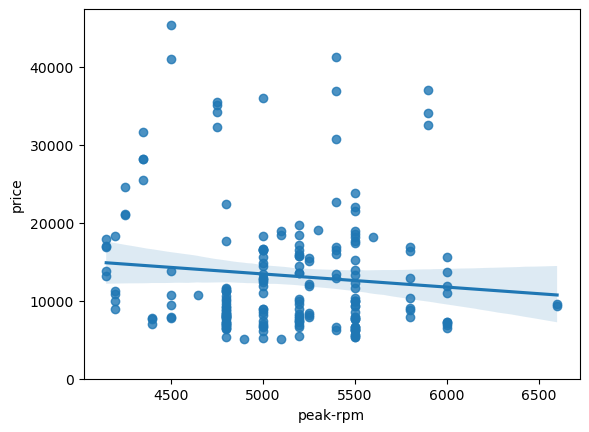

In [75]:
# Step 1: Replace '?' or bad values with NaN
df['peak-rpm'] = df['peak-rpm'].replace('?', np.nan)

# Step 2: Convert to numeric
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')

# Step 3: Now plot
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0, None)
plt.show()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Load data with correct column names
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
                'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
                'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
                'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
                'city-mpg', 'highway-mpg', 'price']

df = pd.read_csv(url, names=column_names)

# Step 2: Replace '?' with NaN
df.replace('?', np.nan, inplace=True)


df=df._get_numeric_data()

In [5]:
%pip install micropip
import micropip
await micropip.install(['ipywidgets'], keep_going=True)
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

   ---------------------------------------- 0.0/46.9 kB ? eta -:--:--
   -------- ------------------------------- 10.2/46.9 kB ? eta -:--:--
   -------- ------------------------------- 10.2/46.9 kB ? eta -:--:--
   -------------------------- ------------- 30.7/46.9 kB 217.9 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/46.9 kB 217.9 kB/s eta 0:00:01
   ---------------------------------------- 46.9/46.9 kB 180.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    plt.figure(figsize=(12, 10))

    xmax = max(xtrain.max(), xtest.max())
    xmin = min(xtrain.min(), xtest.min())
    x    = np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest,  y_test,  'go', label='Test Data')
    plt.plot(x,
             lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))),
             'b-', label='Predicted Function')

    plt.ylim([-10000, 60000])
    plt.xlabel('Feature')      # optional, but helpful
    plt.ylabel('Price')
    plt.legend()
    plt.show()                 # <-- this displays the figure
    plt.close()


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Load data with correct column names
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
                'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
                'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
                'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
                'city-mpg', 'highway-mpg', 'price']

df = pd.read_csv(url, names=column_names)

# Step 2: Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

y_data = df['price']
x_data=df.drop('price',axis=1)
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 184


In [21]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 82
number of training samples: 123


In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Convert to numeric (force strings → NaN → fill with mean)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Fill missing values with mean
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df['price'] = df['price'].fillna(df['price'].mean())

# Split data
X_train = df[['horsepower']]  # 2D: DataFrame with 1 column
y_train = df['price']

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!
